In [63]:
#!/usr/bin/env python

import concurrent.futures
import pandas as pd
import numpy as np
import urllib
import pathlib
import hashlib
import os
import sys
import cv2
import json
import tensorflow as tf
import PIL
import matplotlib.pyplot as plt
import keras

from keras.preprocessing.image import ImageDataGenerator


import foolbox

IMG_HEIGHT = 128
IMG_WIDTH = 128

#image_generator = ImageDataGenerator(rescale=1./255)
#train_data = image_generator.flow_from_directory(batch_size=32,
#	directory=sys.argv[1],
#	target_size=(IMG_HEIGHT, IMG_WIDTH),
#	class_mode=None)

def load_image(filename):
	img = tf.keras.preprocessing.image.load_img(filename, target_size=(IMG_WIDTH,IMG_HEIGHT))
	img = tf.keras.preprocessing.image.img_to_array(img)
	img = np.expand_dims(img, axis=0) / 255
	return img

labels_file = open("labels.json", "r")
labels = json.loads(labels_file.read())

inverted_labels = {v: k for k, v in labels.items()}



In [64]:
model = tf.keras.models.load_model("model.h5")

tf.keras.backend.set_learning_phase(0)
#preprocessing = dict(flip_axis=-1)
#fmodel = foolbox.models.KerasModel(model=model, bounds=(0.0,1.0), preprocessing=preprocessing)
fmodel = foolbox.models.KerasModel(model=model, bounds=(0.0,1.0), predicts="logits")

#keras.backend.set_learning_phase(0)
#kmodel = keras.applications.resnet50.ResNet50(weights='imagenet')
#preprocessing = dict(flip_axis=-1, mean=np.array([104, 116, 123]))  # RGB to BGR and mean subtraction
#fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

model.summary()

img = load_image("persons-cropped/Brad Pitt/10.jpg")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      6976      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)      

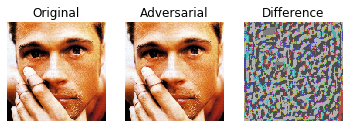

In [73]:
#attack = foolbox.attacks.InversionAttack(fmodel)
attack = foolbox.attacks.FGSM(fmodel)
#attack = foolbox.attacks.GaussianBlurAttack(fmodel)

adv_img = attack(img, np.array([18]))

plt.figure()

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img[0])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adv_img[0])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adv_img[0] - img[0]
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()

In [56]:
print("original:")

predictions = model.predict(img, verbose=1)
#predictions = model.predict(train_data, verbose=1)
prediction = predictions.argmax(axis=-1)

print(predictions)
print(prediction)
map_labels = np.vectorize(lambda i: labels[str(i)])
print(map_labels(prediction))


predictions = model.predict(adv_img, verbose=1)
#predictions = model.predict(train_data, verbose=1)
prediction = predictions.argmax(axis=-1)

print(predictions)
print(prediction)
map_labels = np.vectorize(lambda i: labels[str(i)])
print(map_labels(prediction))
#print(labels[str(prediction)])



original:
1/1 [==============================] - 0s 28ms/sample
[[1.39151363e-28 5.06087058e-26 2.96969640e-29 1.43201019e-27
  1.16514718e-30 2.40513532e-29 1.16307018e-28 2.94022268e-27
  1.89238434e-28 1.98614800e-27 4.29583141e-31 5.82853183e-28
  1.49965063e-29 4.18937353e-25 1.34081911e-32 2.06641868e-26
  1.23464701e-30 6.43377541e-29 1.72716690e-22 9.36191850e-27
  3.35028899e-28 3.38308974e-28 1.28365636e-33 2.25361368e-29
  2.31200788e-29 4.42616618e-30 6.80264693e-32 1.28785196e-30
  3.73644643e-29 7.73530672e-31 1.70382249e-32 5.99626055e-26
  7.87714881e-28 4.80465204e-29 1.37189752e-26 2.03422305e-37
  4.02936683e-28 3.64019831e-30 4.10269128e-32 7.14521394e-29
  3.16767462e-27 1.23673046e-30 8.51859326e-28 1.79488787e-29
  1.03315564e-26 2.00142101e-26 6.73166381e-30 1.51905614e-26
  5.74517985e-35 1.17260245e-30 7.95181181e-28 2.08817965e-25
  6.20106240e-26 6.77133626e-27 3.72554033e-31 6.99426427e-32
  8.05987628e-24 8.04715747e-24 6.65781810e-27 1.42663476e-26
  1.07